# Data management

In [1]:
# import modules
import os.path

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# import datasets
train_values = pd.read_csv('https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv')
train_labels = pd.read_csv('https://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
test_values = pd.read_csv('https://s3.amazonaws.com/drivendata/data/7/public/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')

In [3]:
# merge train_values and train_labels
waterpump = pd.merge(train_values, train_labels, on='id')
waterpump.head(n=2)

# show number of columns and rows in merged waterpump data
print "number of columns =", len(waterpump.columns)
print "number of rows =", len(waterpump)

number of columns = 41
number of rows = 59400


In [4]:
# display all the columns
pd.set_option('display.line_width', 5000)
pd.set_option('display.max_columns', 60)

line_width has been deprecated, use display.width instead (currently both are
identical)



In [5]:
waterpump.head(n=2)
print "number of rows =", len(waterpump)
print "number of columns =", len(waterpump.columns)

number of rows = 59400
number of columns = 41


In [6]:
# take a selection of the data for further analysis
waterpump = pd.DataFrame(waterpump, columns = [['status_group', 'id', 'amount_tsh', 'date_recorded', 'gps_height', 'region', 'population', 'public_meeting', 'permit', 'construction_year', 'extraction_type_class', 'payment_type', 'quality_group', 'quantity', 'source_type', 'source_class', 'waterpoint_type_group']])
waterpump.head(n=2)
print "number of columns after selection = ", len(waterpump.columns)

number of columns after selection =  17


In [7]:
# check on duplicated rows
waterpump = waterpump.drop_duplicates()
print "number of rows after removing duplicates = ", len(waterpump)

number of rows after removing duplicates =  59400


No duplicates

In [8]:
# drop all rows with missing values

# count cells with missing values
#print "number of cells with missing values =", sum(waterpump.isnull().values.ravel())
# or: print "number of cells with missing values =", waterpump.isnull().sum().sum()

# count rows with missing values
#print "number of rows with missing values =", sum([True for idx,row in waterpump.iterrows() if any(row.isnull())])
# or: print "number of rows with missing values =", sum(waterpump.apply(lambda x: sum(x.isnull().values), axis = 1)>0)

# drop rows with missing values
waterpump = waterpump.dropna()
print "number of rows after removing missing values =", len(waterpump)

number of rows after removing missing values = 53281


In [9]:
# create new variable that indicates the period of the waterpump

# 1. create a new variable from date_recorded that only contains the year
waterpump['year_recorded'] = waterpump.date_recorded.str[:4]
# 2. convert year_recorded and construction_year to integer
waterpump['year_recorded'] = waterpump['year_recorded'].astype('int')
waterpump['construction_year'] = waterpump['construction_year'].astype('int')
# 3. remove columns where construction_year is 0
waterpump = waterpump[waterpump.construction_year != 0]
print "number of rows after removing 0 values in construction_year:", len(waterpump)
# 4. create new variable that indicates the period of the waterpump
waterpump['used_period'] = waterpump.apply(lambda x: x["year_recorded"] - x["construction_year"], axis = 1)

number of rows after removing 0 values in construction_year: 34701


In [10]:
# print number of rows with 'functional', 'non functional' and 'functional needs repair' 
print "functional =", len(waterpump[waterpump.status_group == 'functional'])
print "non functional =", len(waterpump[waterpump.status_group == 'non functional'])
print "functional needs repair =", len(waterpump[waterpump.status_group == 'functional needs repair'])

functional = 19782
non functional = 12638
functional needs repair = 2281


In [11]:
# select only the data for which status group is 'functional' or 'non functional'
waterpump = waterpump.loc[waterpump['status_group'].isin(['functional', 'non functional'])]
print "total number of rows for only the status group 'functional' and 'non functional' =", len(waterpump)

total number of rows for only the status group 'functional' and 'non functional' = 32420


In [12]:
# sample data to balance classes as such that both classes represent 50% of the sample and create a balanced dataset
# 1. create 2 datasets for the seperate classes

functional_pumps_raw = waterpump[waterpump['status_group'] == 'functional']
nonfunctional_pumps_raw = waterpump[waterpump['status_group'] == 'non functional']
print "Number of functional waterpumps : %s" % len(functional_pumps_raw)
print "Number of non functional waterpumps : %s" % len(nonfunctional_pumps_raw)

Number of functional waterpumps : 19782
Number of non functional waterpumps : 12638


In [13]:
# 2. since there are fewer nonfunctional waterpumps than functional waterpumps, find the ratio of the sizes
percentage = len(nonfunctional_pumps_raw)/float(len(functional_pumps_raw))
print "percentage of number of non functional pumps compared to functional waterpumps : %s" %percentage

percentage of number of non functional pumps compared to functional waterpumps : 0.638863613386


In [14]:
# 3. and use that percentage to undersample the safe loans
nonfunctional_pumps = nonfunctional_pumps_raw
functional_pumps = functional_pumps_raw.sample(n = 20349, replace=True)

In [15]:
# 4. append the 'nonfunctional_pumps' with the downsampled version of 'functional_pumps'
waterpump_data = nonfunctional_pumps.append(functional_pumps)
print 'number of rows after balancing:', len(waterpump_data)
waterpump_data.head()

number of rows after balancing: 32987


,status_group,id,amount_tsh,date_recorded,gps_height,region,population,public_meeting,permit,construction_year,extraction_type_class,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,year_recorded,used_period
3,non functional,67743,0,2013-01-28,263,Mtwara,58,True,True,1986,submersible,never pay,good,dry,borehole,groundwater,communal standpipe,2013,27
16,non functional,48451,500,2011-07-04,1703,Iringa,35,True,True,1978,gravity,monthly,good,dry,river/lake,surface,communal standpipe,2011,33
17,non functional,58155,0,2011-09-04,1656,Iringa,50,True,True,1978,gravity,on failure,good,dry,river/lake,surface,communal standpipe,2011,33
28,non functional,19685,0,2013-03-05,1443,Kilimanjaro,1,True,True,2000,gravity,monthly,good,insufficient,spring,groundwater,communal standpipe,2013,13
35,non functional,57355,0,2013-03-28,1546,Arusha,200,True,True,2000,other,never pay,good,seasonal,rainwater harvesting,surface,other,2013,13


# Model data preparation

In [16]:
# rename the classes of the status_group: 'functional' = 1, 'non functional' = 0
waterpump_data['status_group_cat'] = waterpump_data['status_group'].apply(lambda x: 1 if x == 'functional' else 0)
# or: waterpump['status_group_cat'] = waterpump['status_group'].replace('functional', 1).replace('non functional', 0)
print "number of columns:", len(waterpump_data.columns)
print "number of rows:", len(waterpump_data)
waterpump_data.head()

number of columns: 20
number of rows: 32987


,status_group,id,amount_tsh,date_recorded,gps_height,region,population,public_meeting,permit,construction_year,extraction_type_class,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,year_recorded,used_period,status_group_cat
3,non functional,67743,0,2013-01-28,263,Mtwara,58,True,True,1986,submersible,never pay,good,dry,borehole,groundwater,communal standpipe,2013,27,0
16,non functional,48451,500,2011-07-04,1703,Iringa,35,True,True,1978,gravity,monthly,good,dry,river/lake,surface,communal standpipe,2011,33,0
17,non functional,58155,0,2011-09-04,1656,Iringa,50,True,True,1978,gravity,on failure,good,dry,river/lake,surface,communal standpipe,2011,33,0
28,non functional,19685,0,2013-03-05,1443,Kilimanjaro,1,True,True,2000,gravity,monthly,good,insufficient,spring,groundwater,communal standpipe,2013,13,0
35,non functional,57355,0,2013-03-28,1546,Arusha,200,True,True,2000,other,never pay,good,seasonal,rainwater harvesting,surface,other,2013,13,0


In [17]:
# 1. select the features and target for the classification algorythm
features = ['id', 'amount_tsh', 'year_recorded', 'construction_year', 'used_period', 'gps_height', 'region', 'population', 'public_meeting', 'permit', 'extraction_type_class', 'payment_type', 'quality_group', 'quantity', 'source_type', 'source_class', 'waterpoint_type_group'] 
            # leave 'date_recorded' out
target = 'status_group_cat'
# extract the feature columns and target column to a numpy matrix
waterpump_data = waterpump_data[features + [target]]

waterpump_data is still a pandas dataframe

In [18]:
waterpump_data.dtypes

id                         int64
amount_tsh               float64
year_recorded              int64
construction_year          int64
used_period                int64
gps_height                 int64
region                    object
population                 int64
public_meeting            object
permit                    object
extraction_type_class     object
payment_type              object
quality_group             object
quantity                  object
source_type               object
source_class              object
waterpoint_type_group     object
status_group_cat           int64
dtype: object

In [19]:
# prepare data for classification: convert categorical variables to numerical variables 
from sklearn import preprocessing

# encoding for multiple variables at once
label = preprocessing.LabelEncoder()
# create new dataframe of dataframe with encoded variables 
waterpump_data_enc = waterpump_data.apply(label.fit_transform)
waterpump_data_enc.head()

,id,amount_tsh,year_recorded,construction_year,used_period,gps_height,region,population,public_meeting,permit,extraction_type_class,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group_cat
3,23068,0,3,26,32,321,9,58,1,1,5,2,2,0,0,0,1,0
16,16658,28,1,18,38,1756,2,35,1,1,0,1,2,0,4,1,1,0
17,19903,0,1,18,38,1709,2,50,1,1,0,3,2,0,4,1,1,0
28,6795,0,3,40,18,1496,4,1,1,1,0,1,2,2,6,0,1,0
35,19648,0,3,40,18,1599,0,192,1,1,3,2,2,3,3,1,5,0


In [20]:
# check on numerical values
waterpump_data_enc.dtypes

id                       int64
amount_tsh               int64
year_recorded            int64
construction_year        int64
used_period              int64
gps_height               int64
region                   int64
population               int64
public_meeting           int64
permit                   int64
extraction_type_class    int64
payment_type             int64
quality_group            int64
quantity                 int64
source_type              int64
source_class             int64
waterpoint_type_group    int64
status_group_cat         int64
dtype: object

In [21]:
## TUTORIAL via Coursera 'Machine Learning for Data Analysis'
# set explanatory and respond variables
predictors = waterpump_data_enc[['id', 'amount_tsh', 'year_recorded', 'construction_year', 'used_period', 'gps_height', 'region', 'population', 'public_meeting', 'permit', 'extraction_type_class', 'payment_type', 'quality_group', 'quantity', 'source_type', 'source_class', 'waterpoint_type_group']]
targets = waterpump_data_enc.status_group_cat

In [22]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

In [23]:
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

In [24]:
# show the shape of the train and test sets
print "(rows, columns)"
print "pred_train shape =", pred_train.shape
print "pred_test shape =", pred_test.shape
print "tar_train shape =", tar_train.shape
print "tar_test shape =", tar_test.shape

(rows, columns)
pred_train shape = (19792, 17)
pred_test shape = (13195, 17)
tar_train shape = (19792,)
tar_test shape = (13195,)


# Decision Tree model

In [25]:
#Build model on training data
tree_clf = DecisionTreeClassifier()
tree_clf = tree_clf.fit(pred_train,tar_train)

In [26]:
# Predict class or regression value for the predicted test samples
tree_predictions = tree_clf.predict(pred_test)

In [27]:
# Compute confusion matrix to evaluate the accuracy of a classification
sklearn.metrics.confusion_matrix(tar_test, tree_predictions)

array([[3924, 1197],
       [ 941, 7133]])

true negatives: 6314
true positives: 6278
false negatives: 1854
false positives: 1834

In [28]:
# leads to the following accuracy classification score:
# model evaluation and scoring parameters on: http://scikit-learn.org/stable/modules/model_evaluation.html

print "percentage of the samples estimated correctly as either a functional waterpump or non functional waterpump:"
print sklearn.metrics.accuracy_score(tar_test, tree_predictions)

percentage of the samples estimated correctly as either a functional waterpump or non functional waterpump:
0.837968927624


In [68]:
# predict class probabilities of the input samples of the to be predicted test samples
predict_probability = tree_clf.predict_proba(pred_test)
predict_probability

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.]])

In [29]:
# create a series with feature importances:
featimp = pd.Series(tree_clf.feature_importances_, index = features)
print featimp

id                       0.114631
amount_tsh               0.064763
year_recorded            0.007365
construction_year        0.045846
used_period              0.077380
gps_height               0.169841
region                   0.040505
population               0.089267
public_meeting           0.006058
permit                   0.009776
extraction_type_class    0.043341
payment_type             0.022546
quality_group            0.010921
quantity                 0.168969
source_type              0.021038
source_class             0.005431
waterpoint_type_group    0.102323
dtype: float64


most important features with feature importance > 0.1 are: id (?), date recorded, GPS height, quantity, waterpump type group

In [30]:
# alternative way to select features http://machinelearningmastery.com/feature-selection-machine-learning-python/
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(predictors, targets)
# summarize scores
np.set_printoptions()
print(fit.scores_)
features_selected = fit.transform(predictors)
# summarize selected features
print(features_selected[0:5,:])
featimp2 = pd.Series(fit.scores_, index = features)
print featimp2

[  6.17132423e+03   4.26430086e+04   4.05553828e+01   1.10244013e+04
   2.07644609e+04   3.75167600e+05   1.86765895e+03   5.20307978e+03
   1.40826821e+01   4.77915980e+01   3.26748316e+03   7.02817487e+01
   2.01022156e+02   7.65330548e+01   6.03335386e+02   6.12519781e+01
   2.60543589e+03]
[[   0   26   32  321]
 [  28   18   38 1756]
 [   0   18   38 1709]
 [   0   40   18 1496]
 [   0   40   18 1599]]
id                         6171.324230
amount_tsh                42643.008561
year_recorded                40.555383
construction_year         11024.401289
used_period               20764.460862
gps_height               375167.599992
region                     1867.658954
population                 5203.079784
public_meeting               14.082682
permit                       47.791598
extraction_type_class      3267.483161
payment_type                 70.281749
quality_group               201.022156
quantity                     76.533055
source_type                 603.335386
sour

NB: Niet hetzelfde als featimp1..

# Explore associations between variables

https://www.coursera.org/learn/data-analysis-tools/lecture/84OFT/python-lesson-3-calculating-correlation

In [74]:
# investigate the correlations between the variable id and date_recorded
import scipy

print ('association between id and date_recorded')
print (scipy.stats.pearsonr(waterpump_data_enc['gps_height'], waterpump_data_enc['quantity']))

association between id and date_recorded
(-0.080502889209567982, 1.4625926291481026e-48)


There does not seem to be any correlation between id and date_recorded

In [35]:
waterpump_data_enc.corr()

,id,amount_tsh,year_recorded,construction_year,used_period,gps_height,region,population,public_meeting,permit,extraction_type_class,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group_cat
id,1.000000,-0.007794,0.008278,-0.012118,0.012906,-0.002504,-0.004977,0.004639,0.002149,-0.004392,0.006360,0.004084,-0.001263,-0.002495,-0.016918,-0.007161,-0.002058,-0.006664
amount_tsh,-0.007794,1.000000,-0.135187,0.055640,-0.066124,0.104105,-0.027795,-0.025901,0.090994,0.047818,-0.074741,-0.401694,-0.067596,-0.057716,-0.019737,0.054585,-0.146308,0.251491
year_recorded,0.008278,-0.135187,1.000000,0.014147,0.065368,0.135740,-0.224290,0.119285,0.026320,0.088523,-0.034738,0.275504,-0.040253,0.042084,-0.068501,-0.075613,0.001837,-0.051274
construction_year,-0.012118,0.055640,0.014147,1.000000,-0.996794,0.016322,-0.079343,0.015738,0.043221,-0.032601,0.033670,0.107194,-0.012430,0.034835,-0.064516,-0.037440,-0.066327,0.282510
used_period,0.012906,-0.066124,0.065368,-0.996794,1.000000,-0.005391,0.061288,-0.006325,-0.041097,0.039651,-0.036332,-0.085269,0.009125,-0.031358,0.058862,0.031448,0.066183,-0.285833
gps_height,-0.002504,0.104105,0.135740,0.016322,-0.005391,1.000000,-0.439147,-0.111366,0.058656,0.014015,-0.410297,-0.156445,-0.213238,-0.082323,0.267606,-0.052383,-0.209763,0.173151
region,-0.004977,-0.027795,-0.224290,-0.079343,0.061288,-0.439147,1.000000,0.076638,-0.078205,-0.063298,0.283993,-0.072562,0.119704,0.010419,-0.255832,0.026346,0.199876,-0.128915
population,0.004639,-0.025901,0.119285,0.015738,-0.006325,-0.111366,0.076638,1.000000,0.045412,-0.079357,0.121557,0.092846,0.075784,0.102313,-0.162796,0.033946,0.148303,-0.027062
public_meeting,0.002149,0.090994,0.026320,0.043221,-0.041097,0.058656,-0.078205,0.045412,1.000000,0.081871,-0.124600,-0.122334,-0.062196,0.003686,0.041265,-0.049838,-0.081900,0.073639
permit,-0.004392,0.047818,0.088523,-0.032601,0.039651,0.014015,-0.063298,-0.079357,0.081871,1.000000,-0.081467,-0.016554,-0.132132,-0.040520,0.114117,0.105392,-0.143570,0.071319


In [36]:
waterpump_data_enc.cov()

,id,amount_tsh,year_recorded,construction_year,used_period,gps_height,region,population,public_meeting,permit,extraction_type_class,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group_cat
id,53260109.207776,-878.559678,59.561457,-1099.663908,1173.687079,-11491.973612,-176.427848,6908.223659,4.223715,-14.467705,80.167091,55.204214,-6.441315,-13.196976,-273.323454,-23.700186,-20.070609,-23.643902
amount_tsh,-878.559678,238.588128,-2.058635,10.686569,-12.727365,1011.050521,-2.085293,-81.643274,0.378531,0.333367,-1.994128,-11.491277,-0.729419,-0.646152,-0.674854,0.382340,-3.020519,1.888516
year_recorded,59.561457,-2.058635,0.971940,0.173429,0.803048,84.140379,-1.074014,23.998811,0.006988,0.039390,-0.059155,0.503032,-0.027724,0.030071,-0.149496,-0.033804,0.002421,-0.024575
construction_year,-1099.663908,10.686569,0.173429,154.616414,-154.449883,127.606297,-4.791999,39.934873,0.144739,-0.182967,0.723159,2.468569,-0.107976,0.313954,-1.775866,-0.211115,-1.102327,1.707797
used_period,1173.687079,-12.727365,0.803048,-154.449883,155.277457,-42.239896,3.709454,-16.083890,-0.137922,0.223008,-0.781999,-1.967853,0.079432,-0.283216,1.623686,0.177704,1.102275,-1.731572
gps_height,-11491.973612,1011.050521,84.140379,127.606297,-42.239896,395327.004070,-1341.122393,-14289.470234,9.932357,3.977284,-445.598578,-182.174971,-93.664654,-37.515816,372.467591,-14.935659,-176.277306,52.927094
region,-176.427848,-2.085293,-1.074014,-4.791999,3.709454,-1341.122393,23.591769,75.964251,-0.102300,-0.138764,2.382618,-0.652740,0.406181,0.036679,-2.750736,0.058030,1.297572,-0.304411
population,6908.223659,-81.643274,23.998811,39.934873,-16.083890,-14289.470234,75.964251,41645.550583,2.495862,-7.309292,42.848127,35.090895,10.804171,15.133187,-73.543146,3.141426,40.450559,-2.684850
public_meeting,4.223715,0.378531,0.006988,0.144739,-0.137922,9.932357,-0.102300,2.495862,0.072532,0.009952,-0.057963,-0.061018,-0.011702,0.000720,0.024602,-0.006087,-0.029481,0.009642
permit,-14.467705,0.333367,0.039390,-0.182967,0.223008,3.977284,-0.138764,-7.309292,0.009952,0.203712,-0.063512,-0.013838,-0.041663,-0.013256,0.114018,0.021571,-0.086609,0.015649


# Visualize Desicion Tree

In [ ]:
# 1. install pyparsing (pip install pyparsing==1.5.7)
# 2. install Graphviz
# 3. install pydot(plus) (pip install pydot==1.0.28)
# reference: http://stackoverflow.com/questions/15951748/pydot-and-graphviz-error-couldnt-import-dot-parser-loading-of-dot-files-will

In [31]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus
from IPython.display import Image   

dot_data = StringIO()  
tree.export_graphviz(classifier, out_file = dot_data, max_depth = 6)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

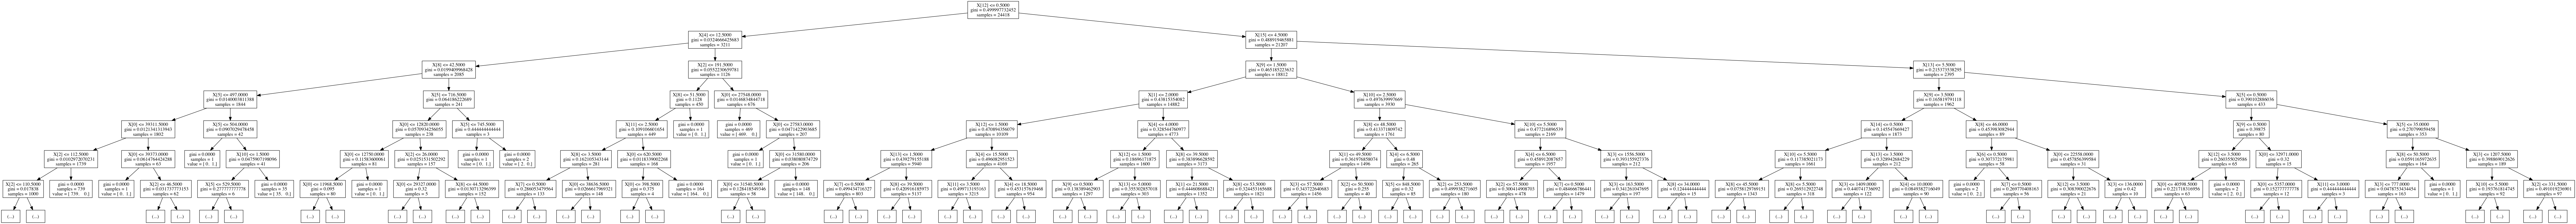

In [32]:
# show tree inline
Image(graph.create_png()) 

In [113]:
# write tree to PDF
graph.write_pdf("waterpump_tree.pdf")

True